In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address where the the dataframe is to be saved
dataFramePickleAddress="E:/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionDataset.pkl"
#dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  Calcium  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151   11.456   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394   10.459   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634   12.915   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642   12.301   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030   13.188   
...                                                 ...       ...      ...   
1785  [2.2846011835800297, 1.157053

In [9]:
#read the log-scaled normalized spectra
logScaledNormalizedSpectraPerSection=dataframe['Log Normalized Spectra'].to_numpy()
#reshape the spectra
temp=[]
for i in range(logScaledNormalizedSpectraPerSection.shape[0]):
    temp.append(logScaledNormalizedSpectraPerSection[i])
logScaledNormalizedSpectraPerSection=np.vstack(logScaledNormalizedSpectraPerSection)

In [10]:
logScaledNormalizedSpectraPerSection.shape

(1790, 512)

In [11]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [13]:
#set the upper and lower limits (in keV) of the channels to be included in the analysis
lowerEnergyBound=511
upperEnergyBound=8000
#get the indices of the bounding channels
lowerBoundChannelIndex=np.argmin(np.abs(energyBands-lowerEnergyBound))
upperBoundChannelIndex=np.argmin(np.abs(energyBands-upperEnergyBound))

In [17]:
#extract relevant data
subsettedLogScaledNormalizedSpectraPerSection=logScaledNormalizedSpectraPerSection[:,
                                                                                   lowerBoundChannelIndex:upperBoundChannelIndex+1]
#extract energy values for the relevant data
relevantChannelEnergies=energyBands[lowerBoundChannelIndex:upperBoundChannelIndex+1]

In [18]:
#import pyplot from matplotlib.pyplot
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
noOfRows=2
noOfPlotsPerRow=5
baseFontSize=18

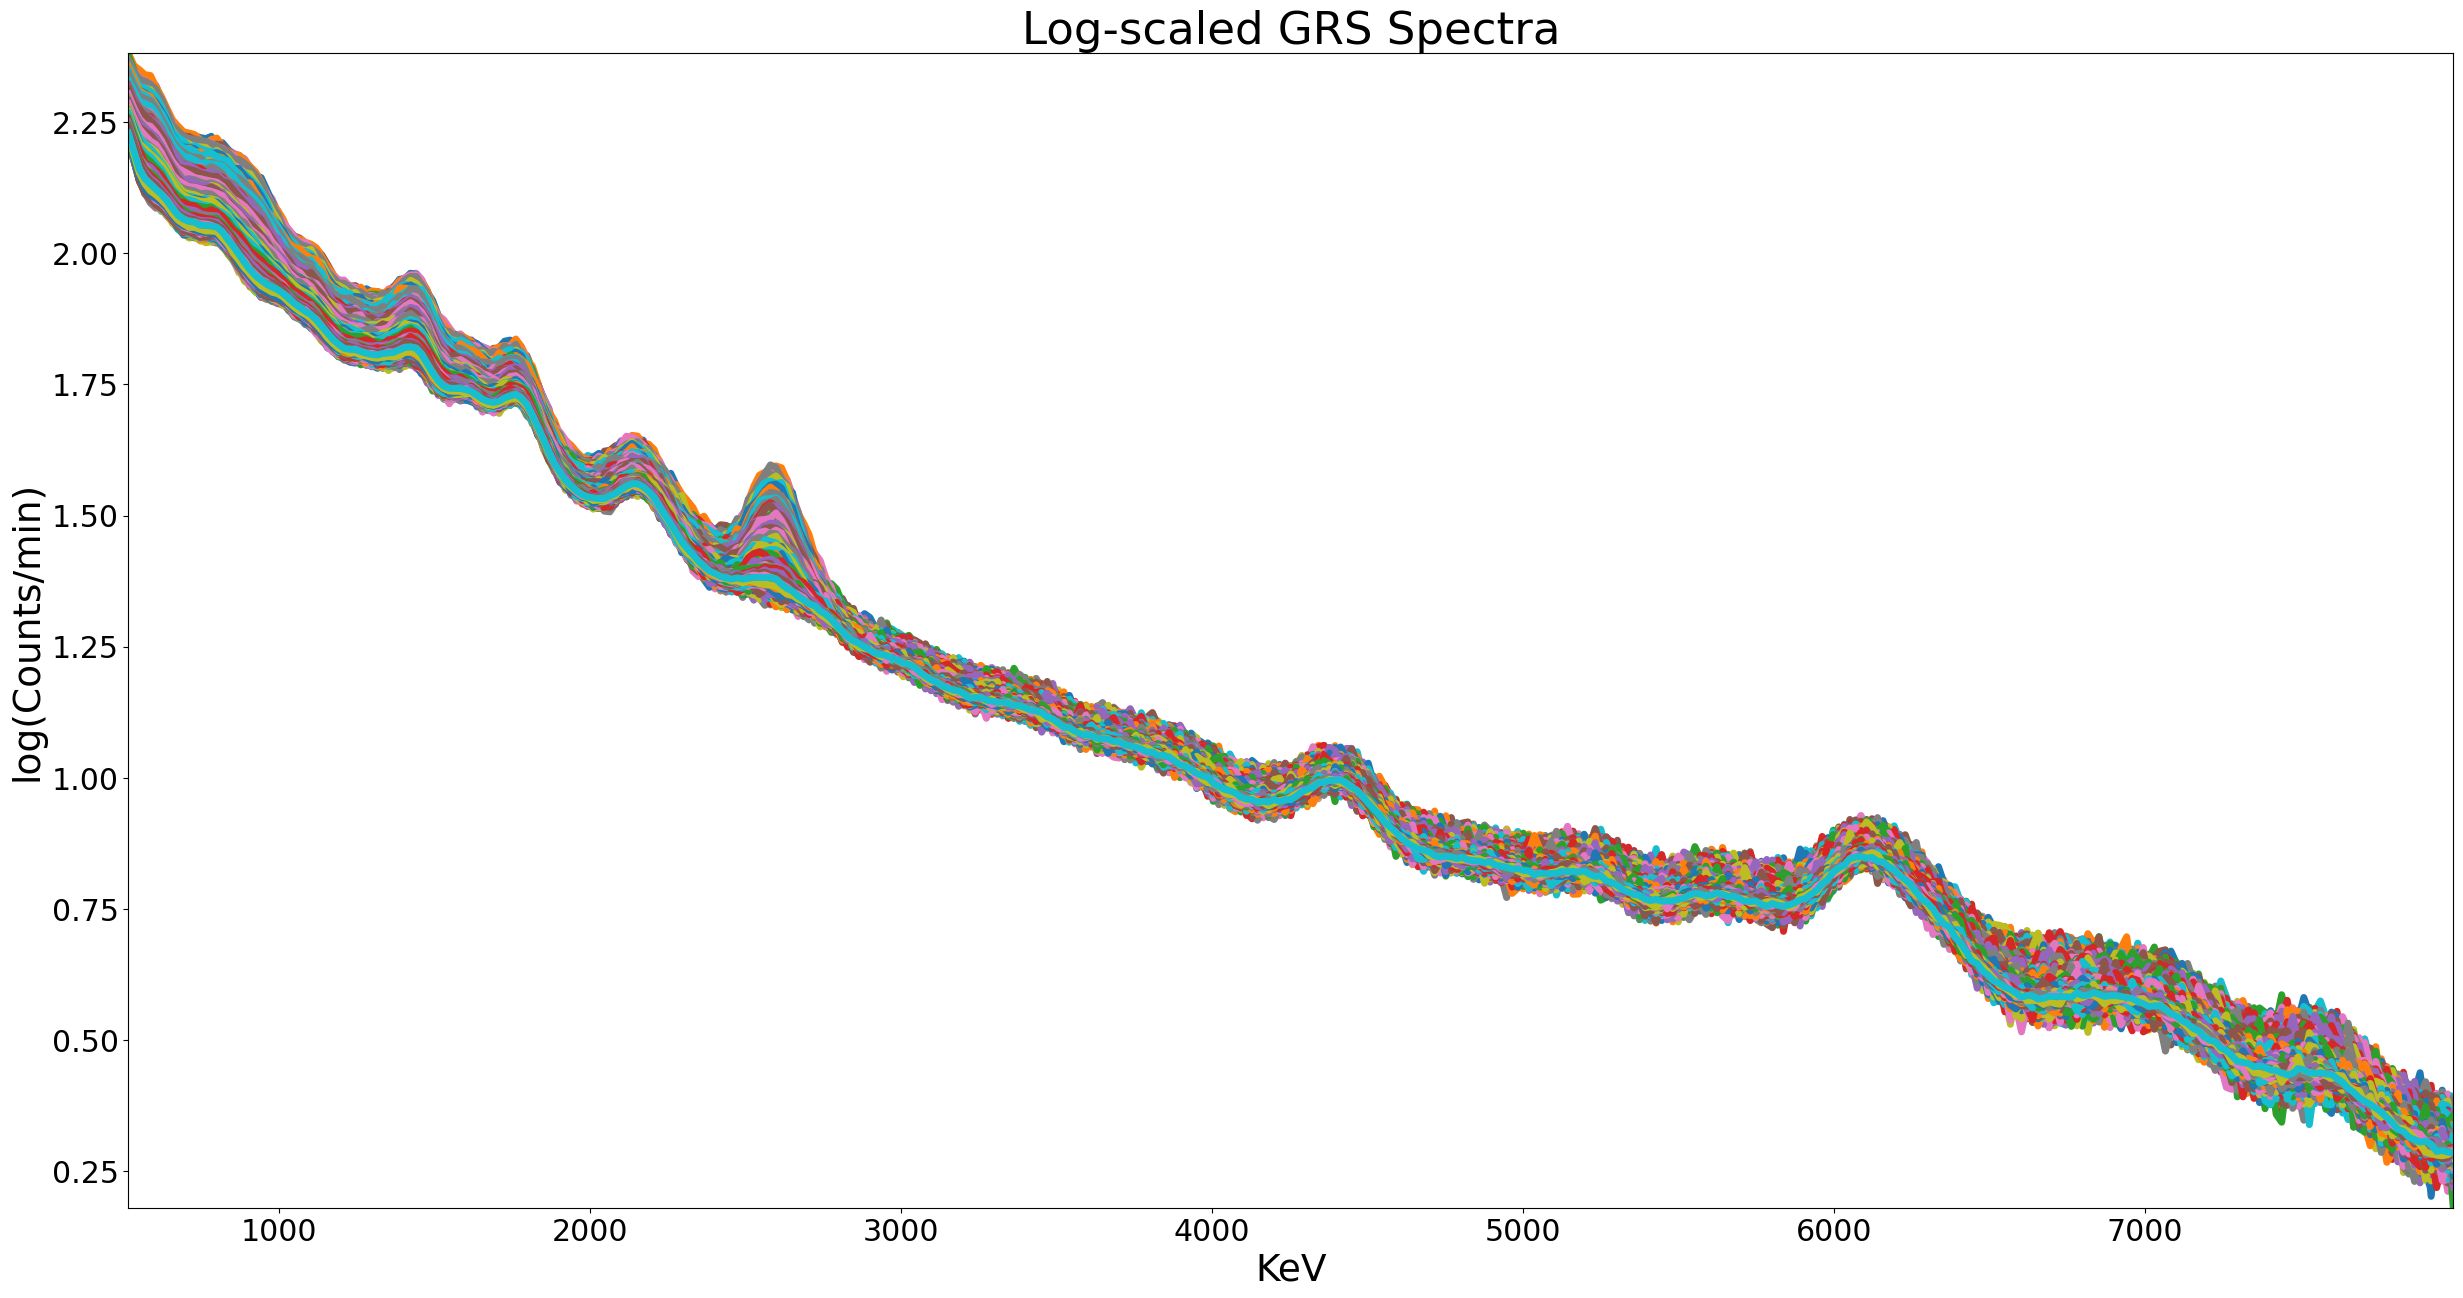

In [25]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(subsettedLogScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(relevantChannelEnergies,
             subsettedLogScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("Log-scaled GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [26]:
#import Savitsky-Golay filter from scipy
from scipy.signal import savgol_filter

In [24]:
#denoise the spectra using a 31 channel wide quadratic Savitsy-Golay filter
denoisedSubsettedLogScaledNormalizedSpectraPerSection=savgol_filter(subsettedLogScaledNormalizedSpectraPerSection,
                                                                    window_length=31,
                                                                    polyorder=2,
                                                                    axis=-1,
                                                                    mode='mirror')

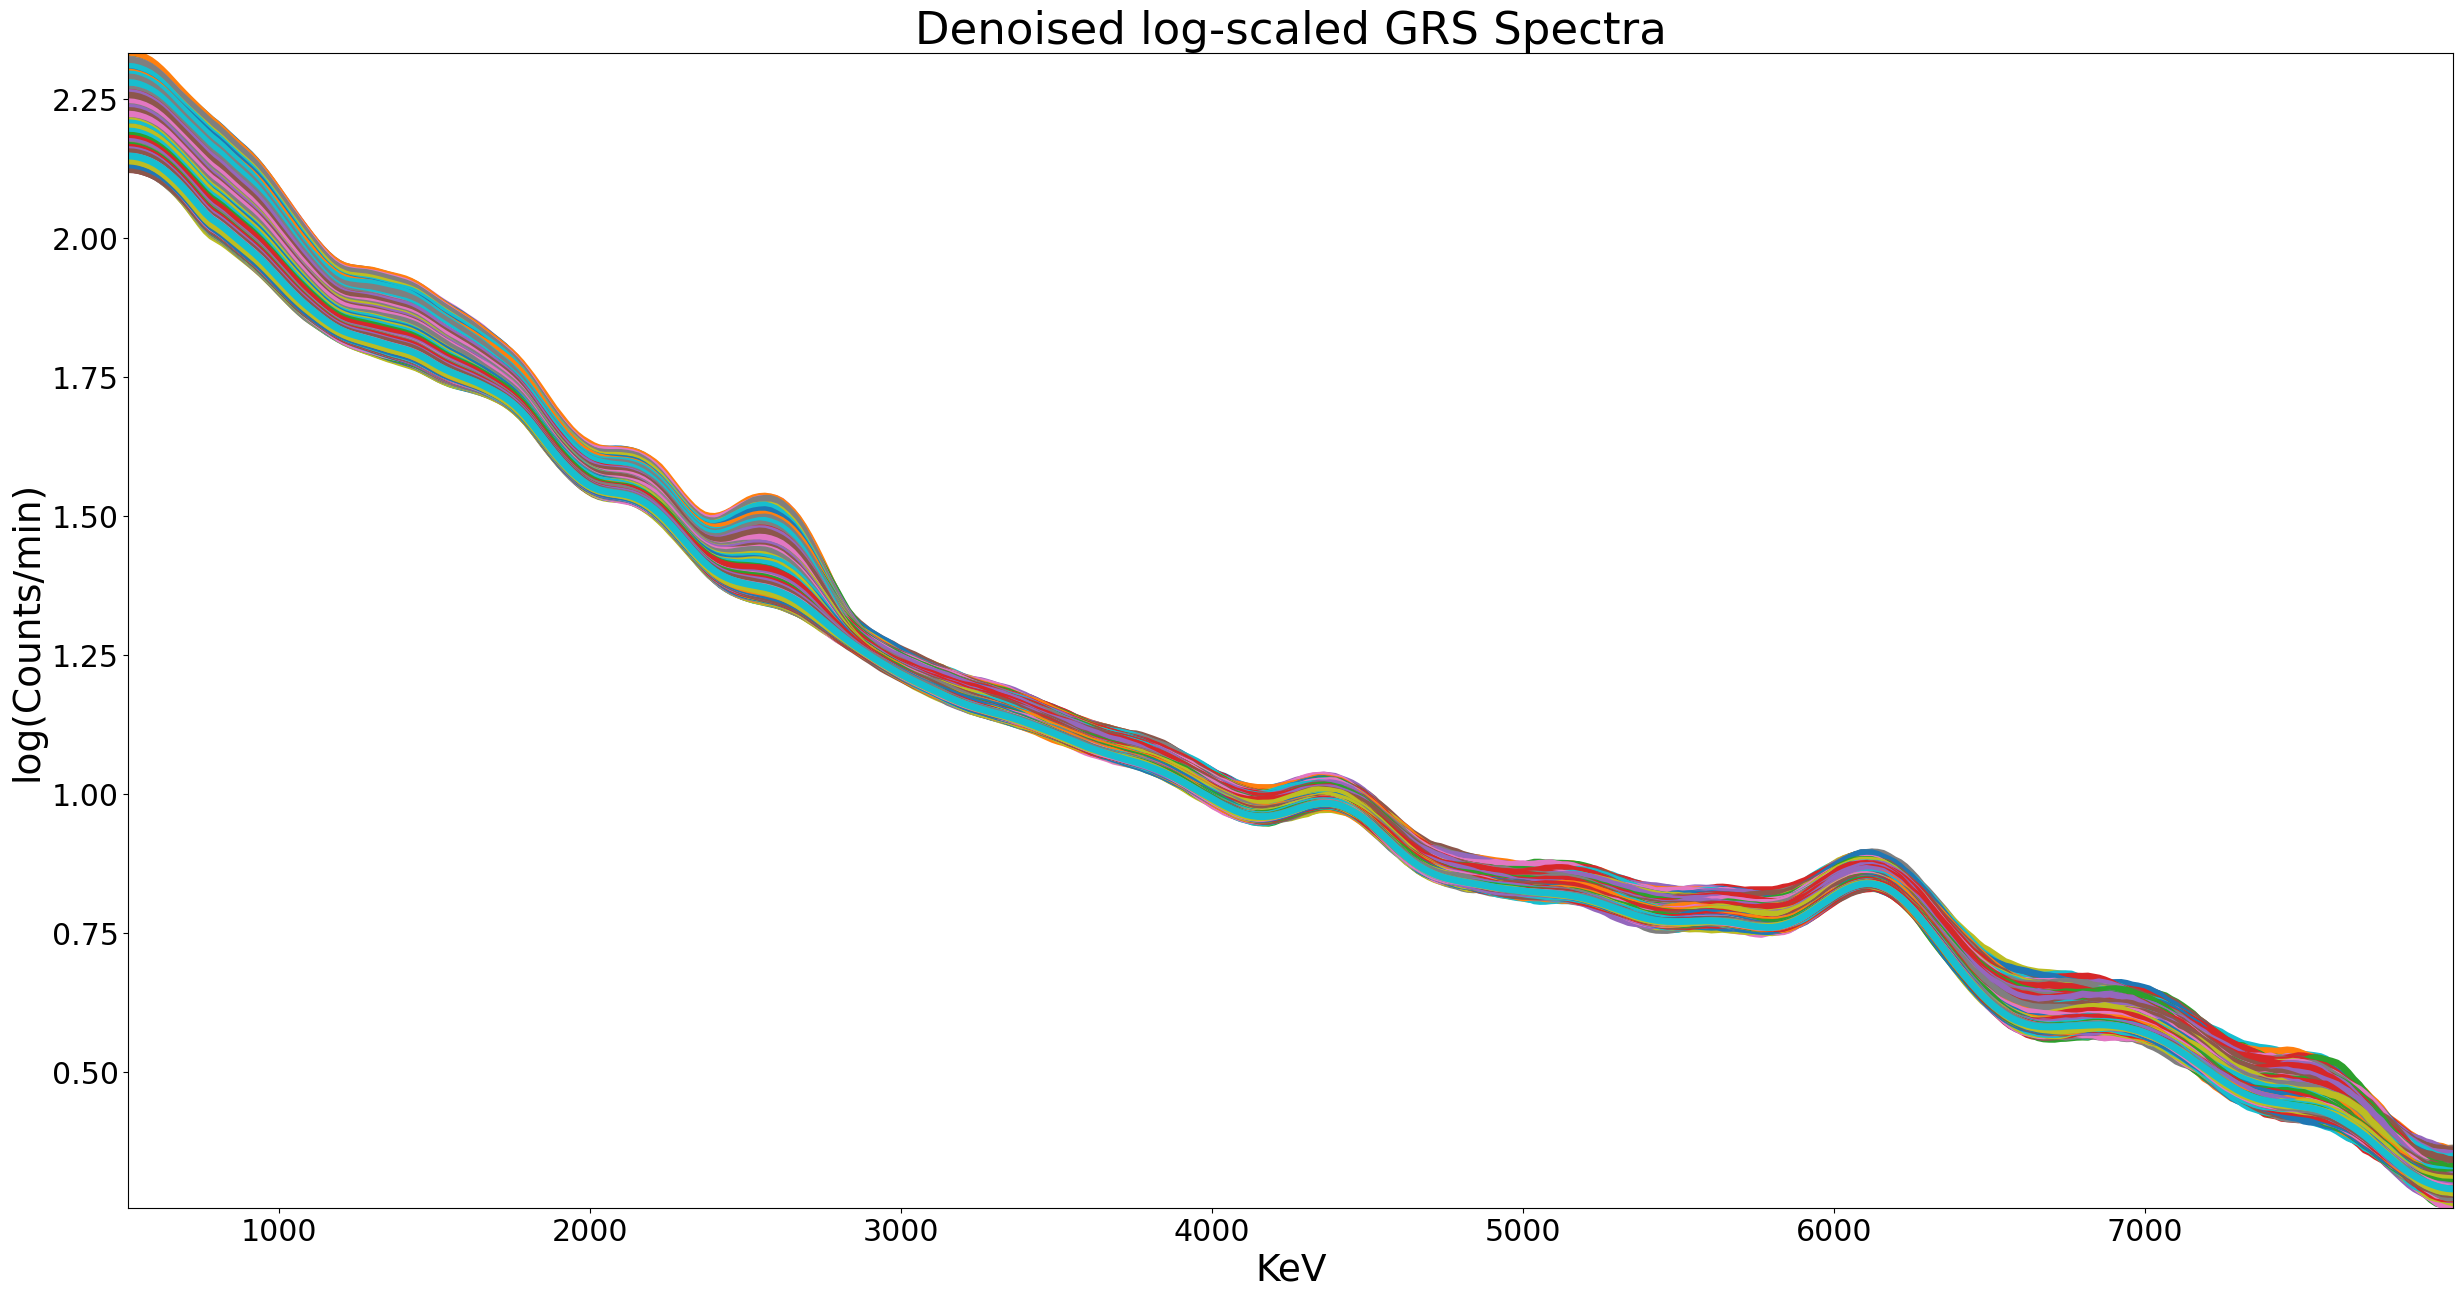

In [27]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(subsettedLogScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(relevantChannelEnergies,
             denoisedSubsettedLogScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("Denoised log-scaled GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [36]:
#remove the continuum form the spectra using the following three steps
#Step 1: Flip the spectra
#Step 2: Remove the Convex Hull
#Step 3: Flip the spectra back

In [28]:
#flip the spectra along y=max-value
reflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection=np.amax(denoisedSubsettedLogScaledNormalizedSpectraPerSection)+(np.amax(denoisedSubsettedLogScaledNormalizedSpectraPerSection)-denoisedSubsettedLogScaledNormalizedSpectraPerSection)

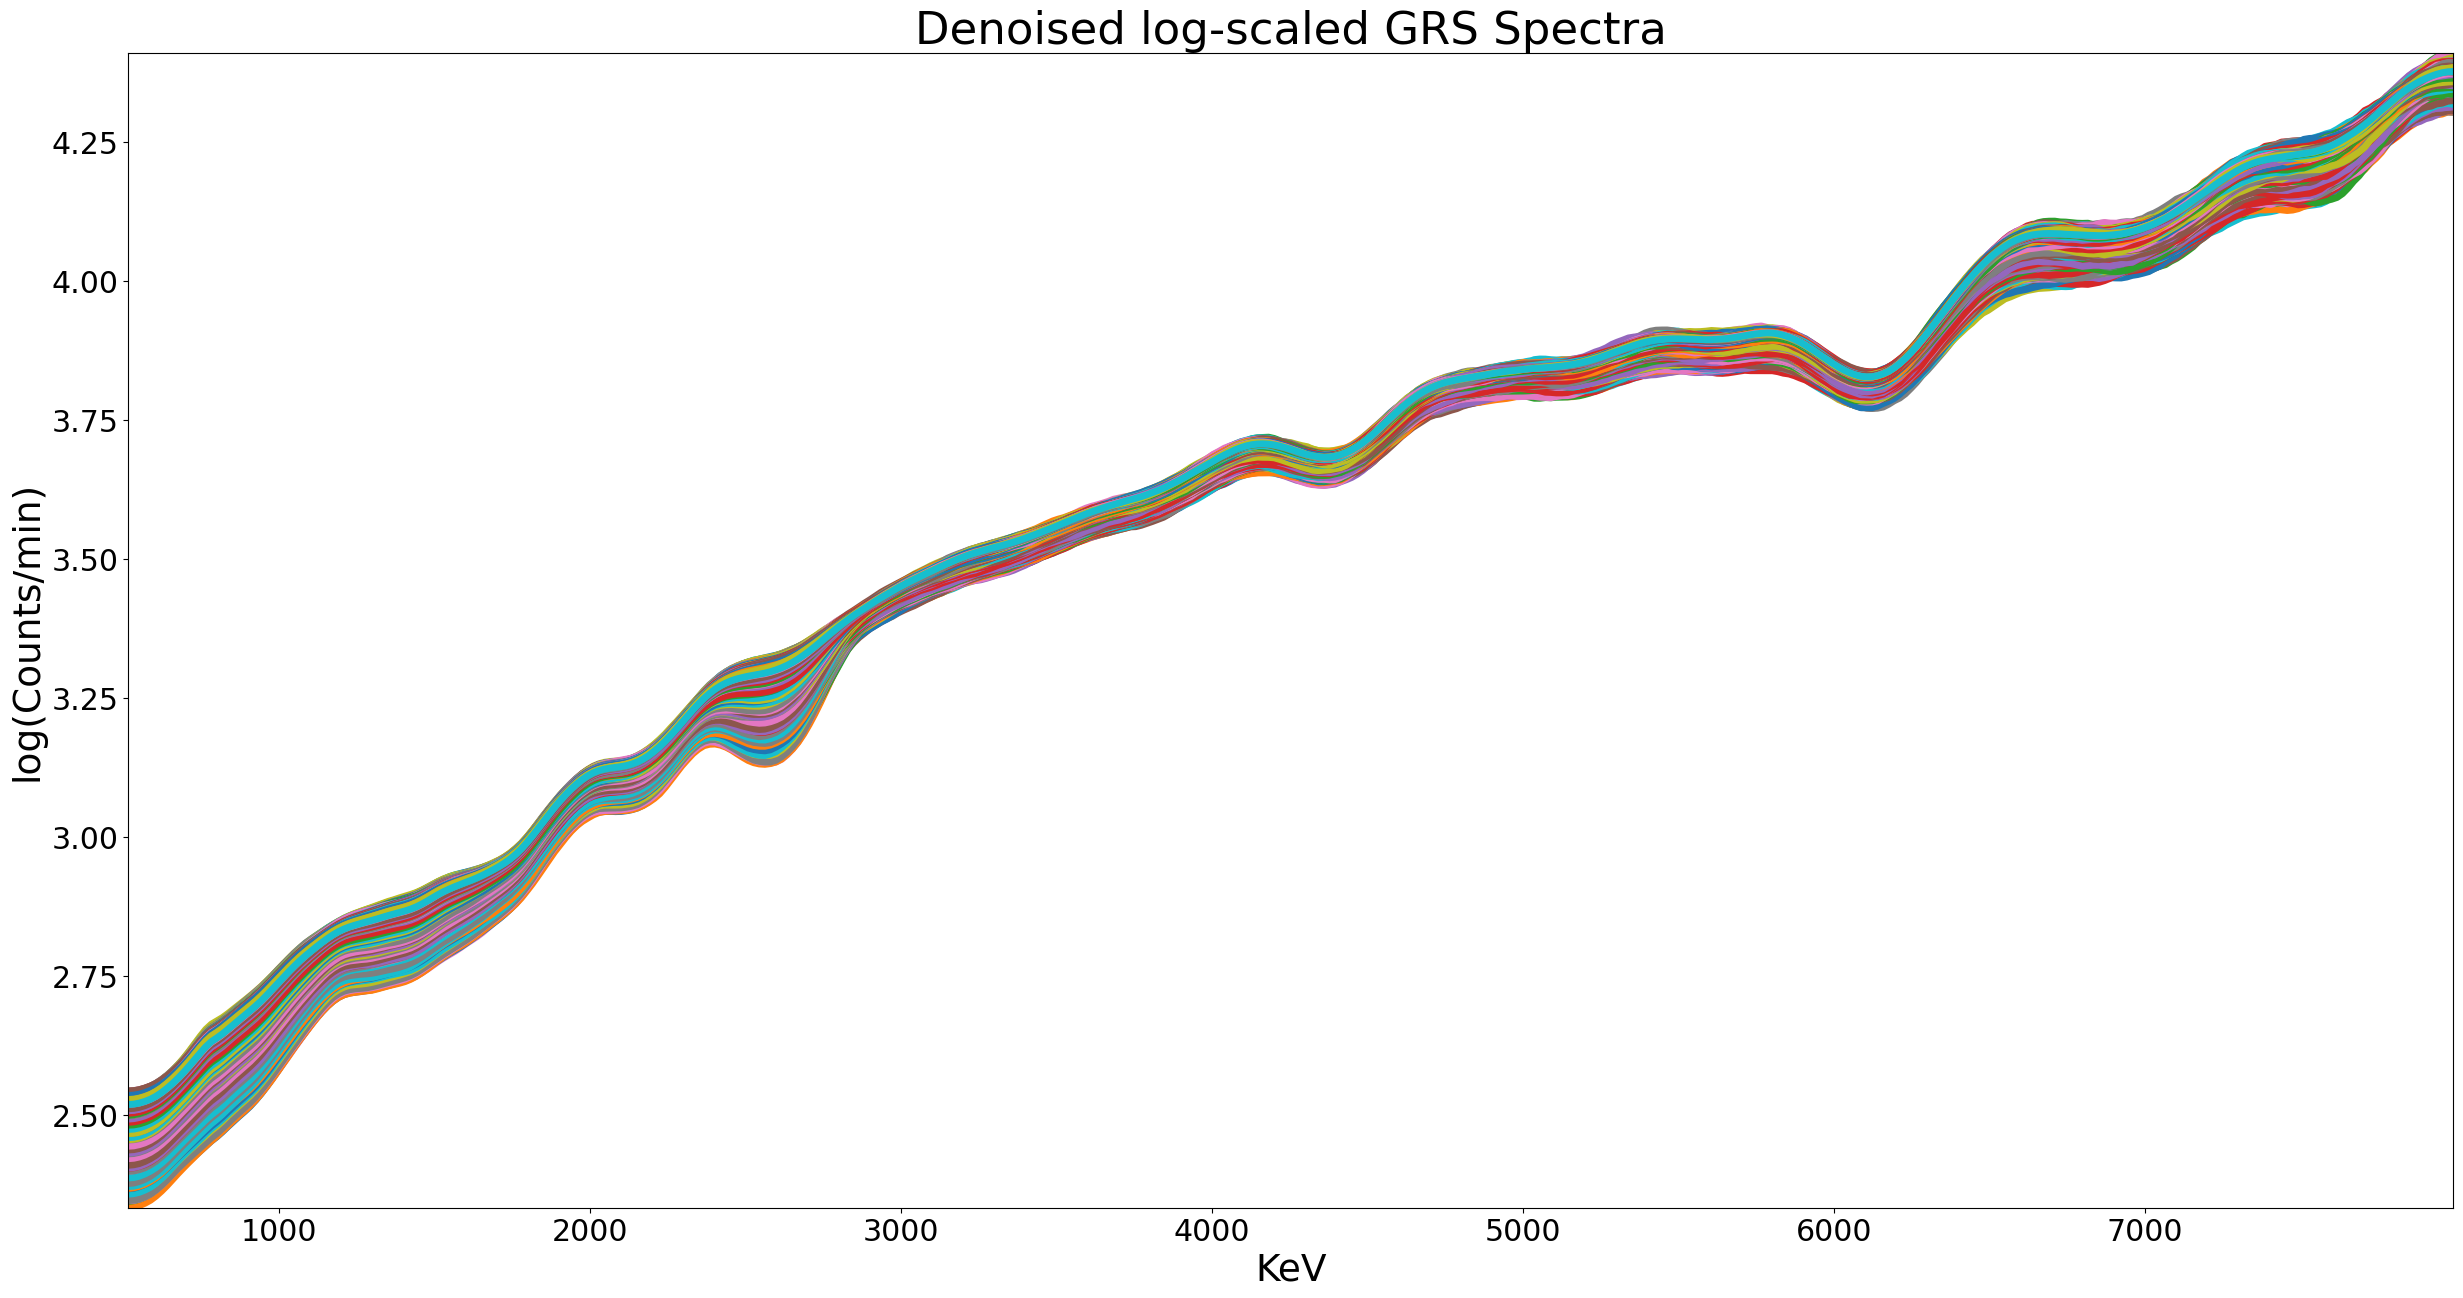

In [29]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(reflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(relevantChannelEnergies,
             reflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("Reflected Denoised log-scaled GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [30]:
#import convex hull removel from pysptools
from pysptools.spectro import convex_hull_removal

In [31]:
#create an array to hold the continuum removed spectrum
continuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection=np.zeros_like(reflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection)

In [34]:
#iterate through the spectra and remove the continuum
for i in range(reflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection.shape[0]):
    continuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection[i,:]=convex_hull_removal(reflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection[i,:],
                                                                                                            relevantChannelEnergies)[0]

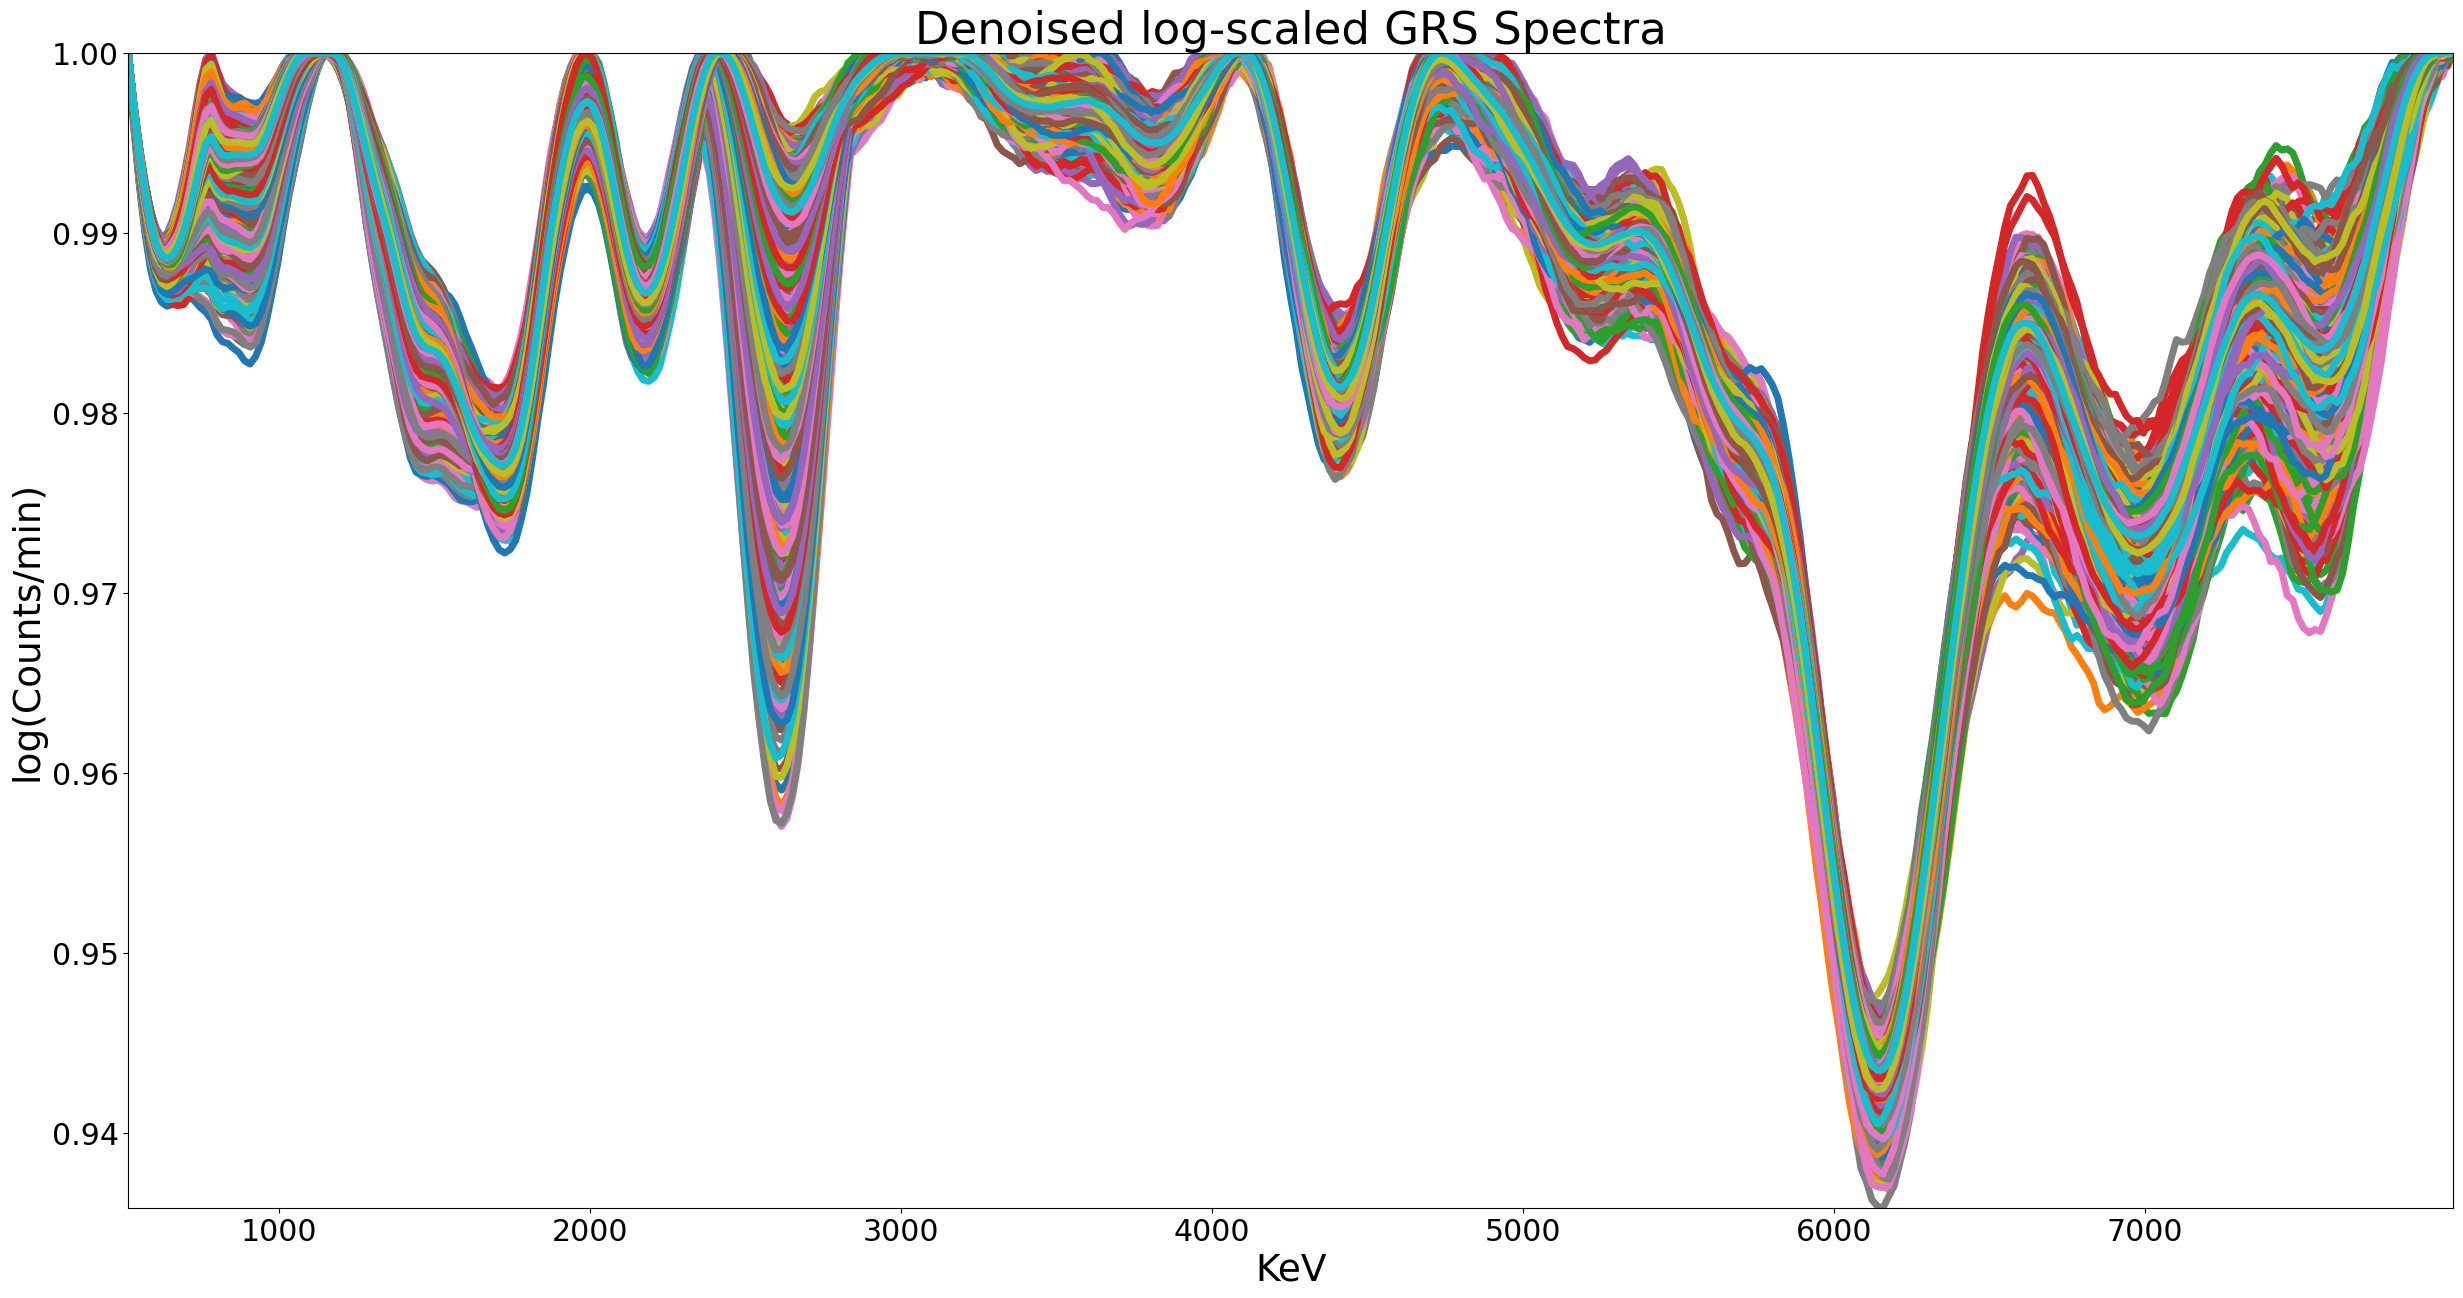

In [35]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(continuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(relevantChannelEnergies,
             continuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("Continuum Removed Reflected Denoised log-scaled GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [39]:
#reflect the continuum removed spectra along the line, y=max counts
flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection=(np.amax(continuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection)-continuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection)

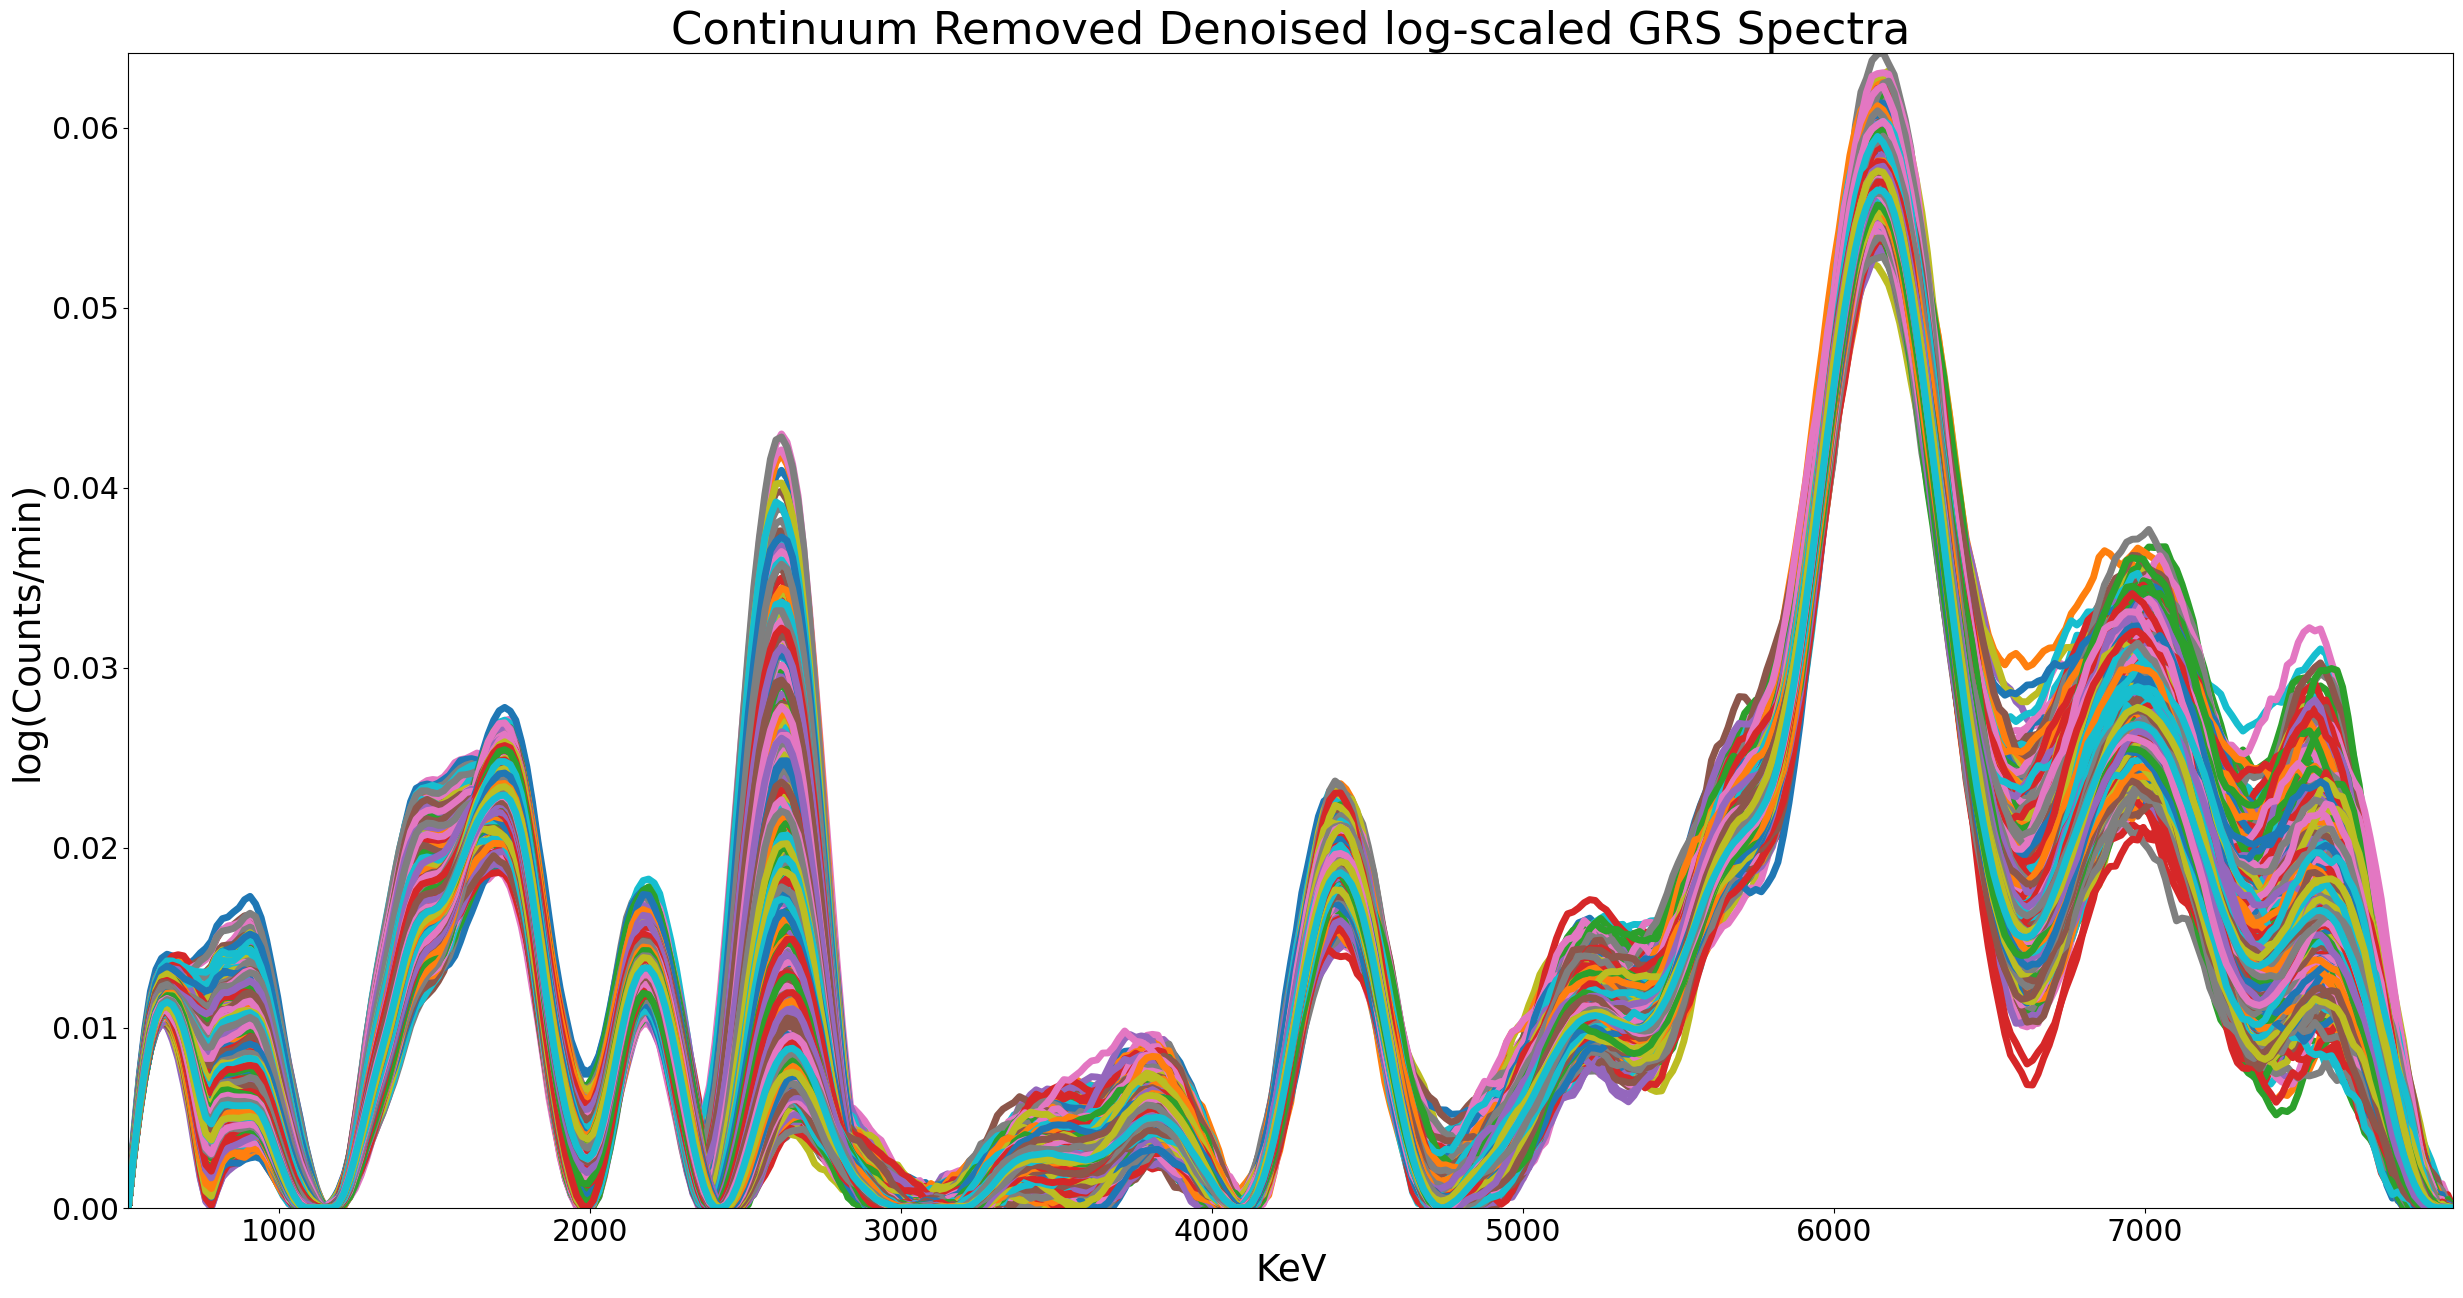

In [41]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(relevantChannelEnergies,
             flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("Continuum Removed Denoised log-scaled GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [42]:
#normalize the continuum removed spectra
normalizedContinuumRemovedSpectra=flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection/np.linalg.norm(flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection,
                                                                                                                                       axis=-1,
                                                                                                                                       keepdims=True)

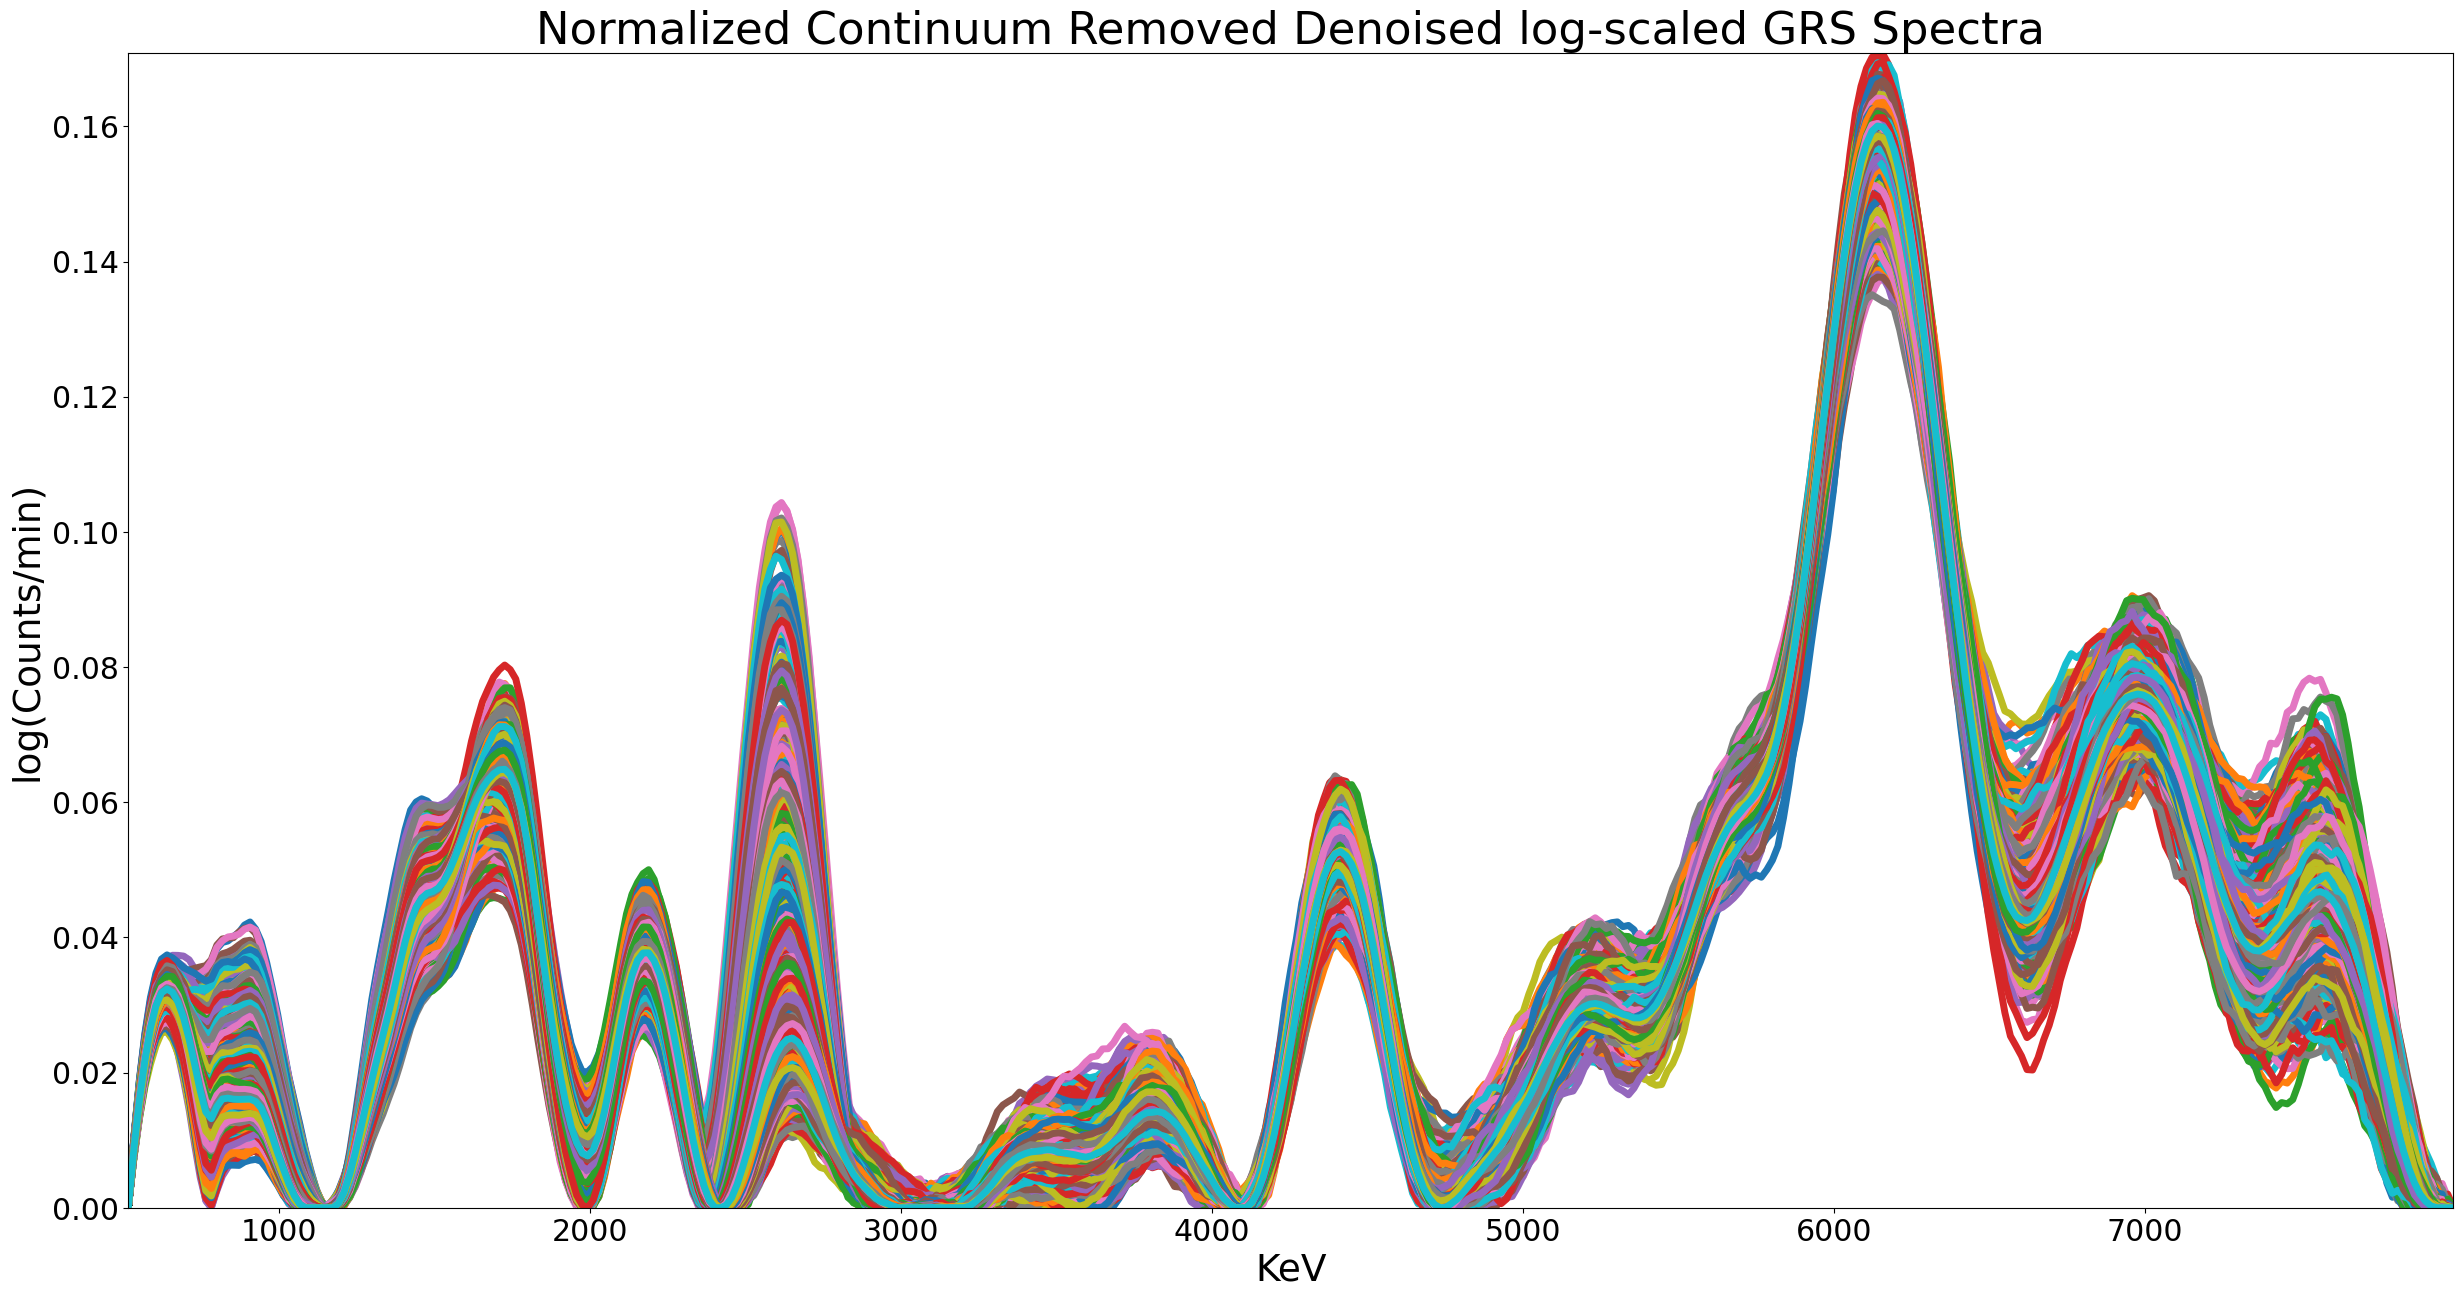

In [45]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(normalizedContinuumRemovedSpectra.shape[0]):
    plt.plot(relevantChannelEnergies,
             normalizedContinuumRemovedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Normalized Continuum Removed Denoised log-scaled GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [48]:
#convert arrays into lists
temp=[]
for i in range(denoisedSubsettedLogScaledNormalizedSpectraPerSection.shape[0]):
    temp.append(denoisedSubsettedLogScaledNormalizedSpectraPerSection[i,:])
denoisedSubsettedLogScaledNormalizedSpectraPerSection=temp


temp=[]
for i in range(flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection.shape[0]):
    temp.append(flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection[i,:])
flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection=temp


temp=[]
for i in range(normalizedContinuumRemovedSpectra.shape[0]):
    temp.append(normalizedContinuumRemovedSpectra[i,:])
normalizedContinuumRemovedSpectra=temp


In [49]:
#add the denoised spectra to the dataframe
dataframe['Denoised Log Scaled Spectra']=denoisedSubsettedLogScaledNormalizedSpectraPerSection
#add the continuum removed denoised spectra to the dataframe
dataframe['Continuum Removed Denoised Log Scaled Spectra']=flippedContinuumRemovedReflectedDenoisedSubsettedLogScaledNormalizedSpectraPerSection
#add the normalized continuum removed denoised spectra to the dataframe
dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra']=normalizedContinuumRemovedSpectra

In [50]:
#show the updated dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [52]:
#set the address where the energy values for the channels are to be saved
energyValuesArrayAddress="E:/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionDataset.npy"
#save the energy values to the desk
np.save(energyValuesArrayAddress,
        relevantChannelEnergies,
        allow_pickle=True,
        fix_imports=True)

In [53]:
#set the address where the the updated dataframe is to be saved
dataFramePickleAddress="E:/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [54]:
#save the updated dataframe
dataframe.to_pickle(dataFramePickleAddress)  